## Desafio de Projeto: Treinamento de Redes Neurais com Transfer Learning
<p>Este desafio faz parte do Bootcamp "BairesDev - Machine Learning Training", da DIO.
<p>O desafio consiste em comparar a performance de uma rede neural criada do zero com a de uma criada a partir da técnica de transfer learning.
<p>O dataset utilizado para o desafio consiste de duas classes de imagens obtidas no Dataset "21 Hand Gesture Images" disponível na plataforma Kaggle pelo link https://www.kaggle.com/datasets/vijay20213/hand-gesture-images-with-mediapipe.
<p>Foram utilizadas as classes de treino 1 e 11.
<p>A ideia do projeto foi baseada na cena do filme "Bastardos Inglórios" na qual um personagem descobre que outros não são alemães com base na forma que eles mostram 3 dedos da mão. Com base nisso, o modelo tenta predizer se a pessoa é alemã ou não pela forma que mostra 3 dedos com a mão.

In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import random

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
print("Importações concluídas com sucesso.")

Importações concluídas com sucesso.


### Carregando e preprocessando os dados de treino e teste

In [2]:
train_split, val_split = .7, .15
TRAIN_PATH = 'train'
# x_train = []
# y_train = []
data = []
# helper function to load image and return it and input vector
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x


for classe in os.listdir(TRAIN_PATH):
    for file in os.listdir(os.path.join(TRAIN_PATH, classe)):
        img_path = os.path.join(TRAIN_PATH, classe, file)
        img, x = get_image(img_path)
        data.append({'x':np.array(x[0]), 'y':classe})

print('Classes:', os.listdir(TRAIN_PATH))
print(len(data), 'imagens anexadas à base de dados')

#Embaralhando o dataset
random.shuffle(data)

# Dividindo o dataset em treino/validação/teste
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

#Separando por labels:
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]

# normalize data
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# convert labels to one-hot vectors
num_classes = len(os.listdir(TRAIN_PATH))
y_train = keras.utils.to_categorical(y_train)
y_val = keras.utils.to_categorical(y_val)
y_test = keras.utils.to_categorical(y_test)
print(y_test.shape)

# summary
print(f"finished loading {len(data)} images from {num_classes} categories")
print(f"train / validation / test split: {len(x_train)} / {len(x_val)} / {len(x_test)}")
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)


Classes: ['0', '1']
400 imagens anexadas à base de dados
(60, 2)
finished loading 400 images from 2 categories
train / validation / test split: 280 / 60 / 60
training data shape:  (280, 224, 224, 3)
training labels shape:  (280, 2)


In [3]:
print(os.listdir(TRAIN_PATH))

['0', '1']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


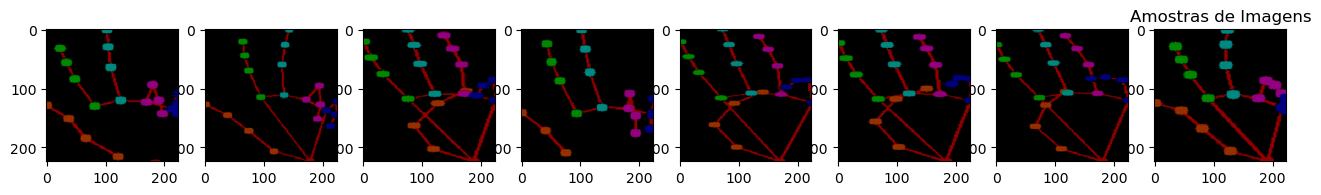

In [4]:
n_samples = 8
idxs = random.sample(range(len(x_train)), n_samples)
plt.figure(figsize=(16,4))
for i, idx in enumerate(idxs):
    plt.subplot(1, n_samples, i+1)
    plt.imshow(x_train[idx].astype('float32'))
plt.title('Amostras de Imagens')
plt.show()

### Método 1: Criando e Treinando Rede Neural do Zero

In [5]:
# build the network
print("Input dimensions: ", x_train.shape[1:])
model = Sequential(
    [
        Input(shape=x_train.shape[1:]),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.25),
        Dense(num_classes, activation='softmax'),
    ]
)

model.summary()

Input dimensions:  (224, 224, 3)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,209,058 (4.61 MB)

 Trainable params: 1,209,058 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Training the network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 49s 13s/step - accuracy: 0.4972 - loss: 0.7868 - val_accuracy: 0.5167 - val_loss: 0.6216
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.5881 - loss: 0.6377 - val_accuracy: 1.0000 - val_loss: 0.5039
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 1.0000 - loss: 0.4177 - val_accuracy: 1.0000 - val_loss: 0.1770
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 1.0000 - loss: 0.1098 - val_accuracy: 1.0000 - val_loss: 0.0126
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 1.0000 - val_loss: 4.2354e-04
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 1.0000 - loss: 5.9821e-04 - val_accuracy: 1.0000 - val_loss: 1.4889e-05
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 1.0000 - loss: 5.2218e-04 - val_accuracy: 1.0000 - val_loss: 9.3380e-08
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 1.0000 - loss: 6.0112e-07 - val_accuracy: 1.0000 - 

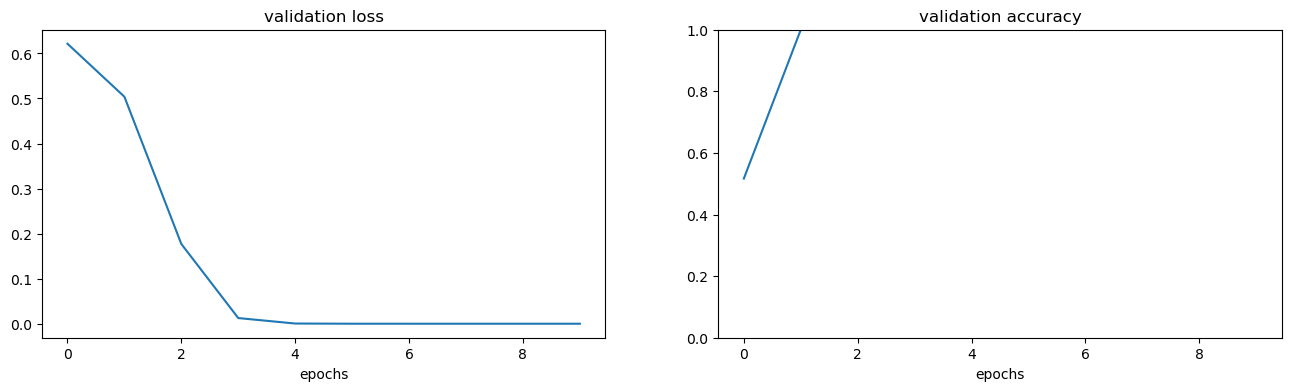

Test loss: 1.3907745177732522e-08
Test accuracy: 1.0


In [7]:
#plotting Validation loss and accuracy ove training time
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

### Método 2: Utilizando Transfer Learning a partir de Rede Existente (VGG16)

In [8]:
#Getting base network
vgg = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
inp = vgg.input

new_classification_layer = Dense(num_classes, activation='softmax')
outp = new_classification_layer(vgg.layers[-2].output)

# New model:
tl_model = Model(inp, outp)

# Freezing the new model weights (except for the last layer):
for layer in tl_model.layers[:-1]:
    layer.trainable = False

tl_model.layers[-1].trainable = True

tl_model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 8,194 (32.01 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

In [10]:
tl_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
new_history = tl_model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3445s 396s/step - accuracy: 0.5141 - loss: 0.9671 - val_accuracy: 0.4833 - val_loss: 0.7581
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1157s 275s/step - accuracy: 0.5073 - loss: 0.7989 - val_accuracy: 0.6000 - val_loss: 0.6084
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 862s 232s/step - accuracy: 0.6226 - loss: 0.6096 - val_accuracy: 0.5167 - val_loss: 0.6626
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1111s 296s/step - accuracy: 0.5751 - loss: 0.6168 - val_accuracy: 0.4833 - val_loss: 0.6385
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1177s 372s/step - accuracy: 0.5091 - loss: 0.5987 - val_accuracy: 0.9500 - val_loss: 0.4811
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1074s 314s/step - accuracy: 0.9621 - loss: 0.4505 - val_accuracy: 0.7333 - val_loss: 0.4810
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1228s 381s/step - accuracy: 0.7727 - loss: 0.4571 - val_accuracy: 0.9667 - val_loss: 0.4200
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 871s 241s/step - accuracy: 0.9438 - loss: 0.3995 - val_accuracy: 0.88

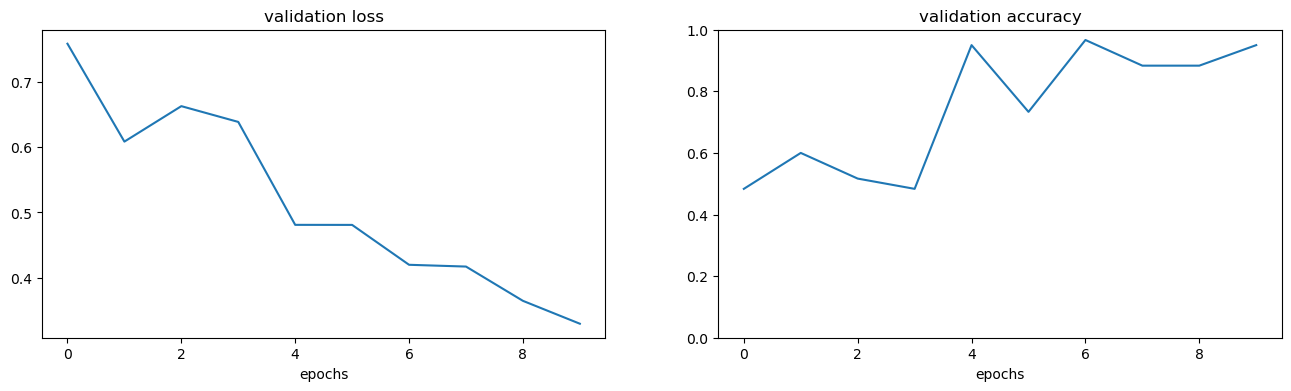

Test loss: 0.2836417555809021
Test accuracy: 1.0


In [11]:
#plotting Validation loss and accuracy ove training time
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(new_history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(new_history.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

loss, accuracy = tl_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)